Name: Harsha TR

Class: IT A

Reg No.: 195002047

In [1]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [2]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [3]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


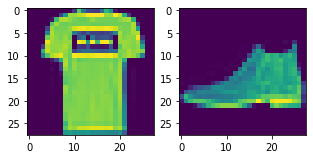

In [14]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[1])

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0])

In [15]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [16]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [17]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [18]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [19]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [27]:
import keras
from keras.layers import LeakyReLU

In [28]:
batch_size = 64
epochs = 20
num_classes = 10

In [29]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [30]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [31]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [32]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 90s 118ms/step - loss: 0.4638 - accuracy: 0.8301 - val_loss: 0.3251 - val_accuracy: 0.8823
Epoch 2/20
750/750 [==============================] - 88s 118ms/step - loss: 0.2873 - accuracy: 0.8945 - val_loss: 0.2768 - val_accuracy: 0.8992
Epoch 3/20
750/750 [==============================] - 94s 125ms/step - loss: 0.2427 - accuracy: 0.9093 - val_loss: 0.2627 - val_accuracy: 0.9056
Epoch 4/20
750/750 [==============================] - 96s 128ms/step - loss: 0.2104 - accuracy: 0.9236 - val_loss: 0.2526 - val_accuracy: 0.9095
Epoch 5/20
750/750 [==============================] - 94s 125ms/step - loss: 0.1848 - accuracy: 0.9309 - val_loss: 0.2356 - val_accuracy: 0.9140
Epoch 6/20
750/750 [==============================] - 94s 126ms/step - loss: 0.1622 - accuracy: 0.9389 - val_loss: 0.2429 - val_accuracy: 0.9123
Epoch 7/20
750/750 [==============================] - 95s 126ms/step - loss: 0.1429 - accuracy: 0.9458 - val_loss: 0.2595 - val_ac

In [33]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 8s 24ms/step - loss: 0.4577 - accuracy: 0.9104


In [34]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.45771220326423645
Test accuracy: 0.9103999733924866
